In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# Train Data:
# Store - the store number
# Dept - the department number
# Date - the week
# Weekly_Sales -  sales for the given department in the given store
# IsHoliday - whether the week is a special holiday week

train = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/train.csv.zip')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
# Test Data:
# Store - the store number
# Dept - the department number
# Date - the week
# IsHoliday - whether the week is a special holiday week

test = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/test.csv.zip')
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
# Info about stores
stores = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/stores.csv')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
# Features data:
# Store - the store number
# Date - the week
# Temperature - average temperature in the region
# Fuel_Price - cost of fuel in the region
# MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
# CPI - the consumer price index
# Unemployment - the unemployment rate
# IsHoliday - whether the week is a special holiday week

features = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/features.csv.zip')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# ARIMA (AutoRegressive Integrated Moving Average)

An ARIMA model is denoted as ARIMA$(p, d, q)$, where:

* AR (p): Autoregressive part

  * This component indicates that the current value in the time series is linearly dependent on its own past values.

  * 'p' is the order of the AR part, representing the number of lagged observations to include in the model.

  For example, an AR(1) model means the current value depends on the immediately preceding value.

  * It models the relationship between an observation and a number of lagged observations.

* I (d): Integrated part

  * This component represents the differencing required to make the time series stationary. A stationary series has a constant mean, variance, and autocorrelation over time. Many time series are non-stationary (e.g., they have trends).

  * 'd' is the differencing order, indicating the number of times the raw observations are differenced.

  If d=0, no differencing is applied (the series is already stationary).

  If d=1, the first-order difference is taken (current value minus previous value).

  If d=2, the difference of the first-order difference is taken.

  * Differencing helps to remove trends and seasonality, making the series stationary.

* MA (q): Moving Average part

  * This component indicates that the current value is linearly dependent on the current and lagged forecast errors (residuals from a moving average model).

  * 'q' is the order of the MA part, representing the number of lagged forecast errors to include in the model.

  For example, an MA(1) model means the current value depends on the current error and the error from the previous time step.

  * It models the relationship between an observation and a residual error from a moving average model applied to lagged observations.


# SARIMA (Seasonal AutoRegressive Integrated Moving Average)

A SARIMA model is denoted as SARIMA$(p, d, q)(P, D, Q, s)$, where:

* The first set of parameters (p,d,q) are the non-seasonal components, identical to the ARIMA model described above.

* The second set of parameters (P,D,Q,s) are the seasonal components:

  * P: Seasonal Autoregressive order. Similar to 'p', but for seasonal lags (e.g., if s=52 for weekly data, P=1 means it considers the value 52 weeks ago).

  * D: Seasonal Differencing order. Similar to 'd', but for seasonal lags (e.g., if s=52 and D=1, it differences the current value with the value from 52 weeks ago).

  * Q: Seasonal Moving Average order. Similar to 'q', but for seasonal lags.

  * s: The length of the seasonal period (e.g., 12 for monthly data, 52 for weekly data, 7 for daily data with weekly seasonality).

# SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors)

SARIMAX is an extension of SARIMA that allows for the inclusion of exogenous variables (also called covariates or regressors). It's denoted as SARIMAX$(p, d, q)(P, D, Q, s)$ and includes an additional input for external variables.

* Exogenous Variables (X): These are independent variables that are not part of the time series itself but are believed to influence the time series.

  * In Walmart sales data, examples of exogenous variables include: Temperature, Fuel_Price, CPI, Unemployment, MarkDown1-5, Size, Type, IsHoliday, and your custom Holiday flags (SuperBowl, LaborDay, etc.).

  * The model learns the linear relationship between these external variables and the time series.

  * Crucially, when making predictions with SARIMAX, you must provide the future values of these exogenous variables for the forecast horizon. This is why having features.csv available for the test set dates is vital.

In [ ]:
!pip install -q dagshub "mlflow < 3"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.6/680.6 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

In [ ]:
!pip cache purge

Files removed: 0


In [ ]:
!pip uninstall -y numpy pmdarima

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2


In [ ]:
!pip install -q torch torchvision pandas numpy==1.26.4 matplotlib seaborn scikit-learn pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Attempt to fix numpy/scipy dependency issue
!pip uninstall -y numpy scipy
!pip install -q numpy==1.26.4 scipy==1.11.4

LAST CODE:

Initialized MLflow to track repo "mrekh21/Walmart_Recruiting"

Repository mrekh21/Walmart_Recruiting initialized!

/usr/local/lib/python3.11/dist-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(



--- Weekly Sales for Store 1, Dept 1 ---
ADF Statistic: -2.52
p-value: 0.110
Critical Values: {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}
Fail to reject H0, series is likely non-stationary. Consider differencing.
KPSS Statistic: 0.10
p-value: 0.100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Fail to reject H0, series is likely stationary.


/tmp/ipython-input-3792216801.py:168: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c')


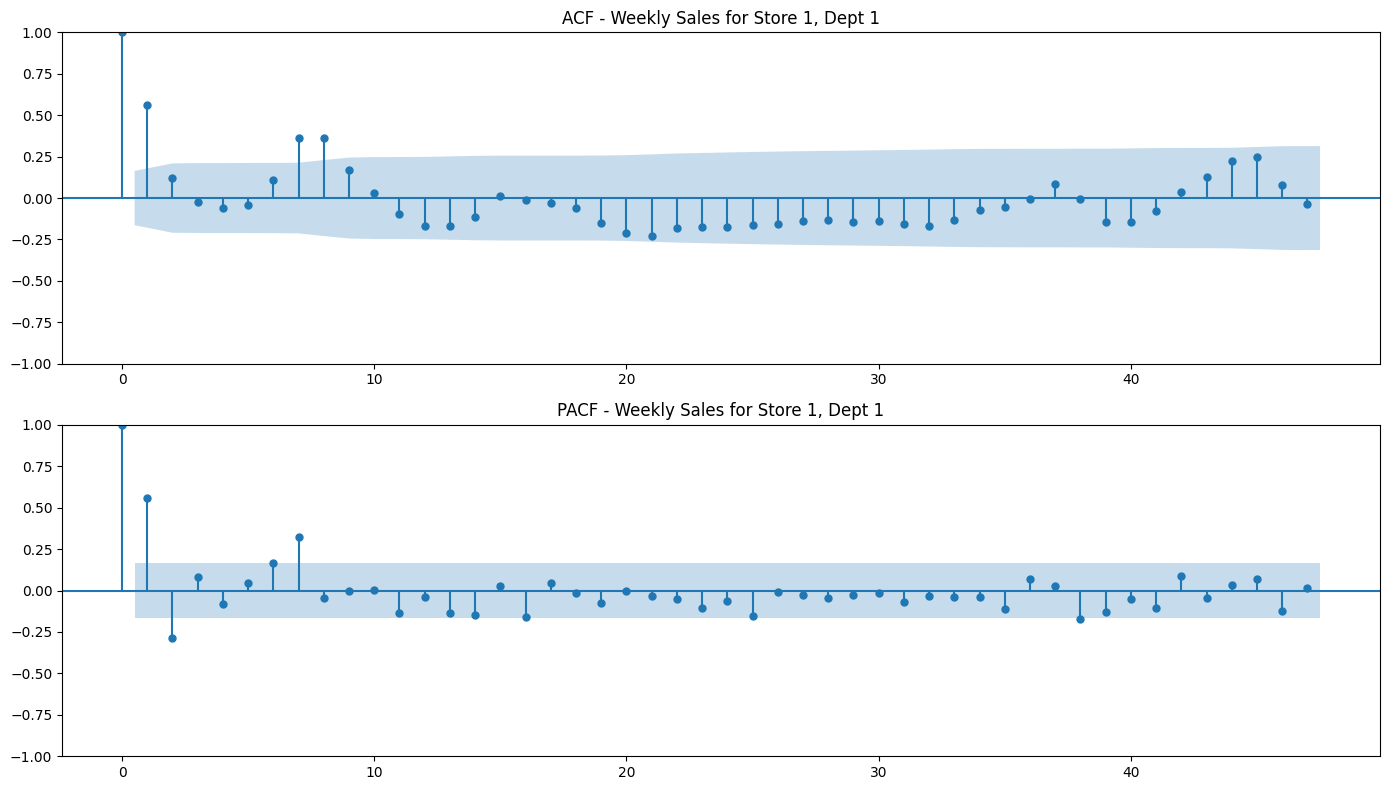

🏃 View run Preprocessing_ARIMA at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/3/runs/9a9934b0bcf84e16ae0f4d49ba620fba
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/3


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


🏃 View run CV_ARIMA at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/3/runs/b1c54627370048a6b7d279ca430f787f
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/3


2025/07/31 15:30:33 INFO mlflow.pyfunc: Inferring model signature from input example
/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'WalmartSalesForecast_ARIMA' already exists. Creating a new version of this model...
2025/07/31 15:30:39 INFO mlflow.store.model_registry.abstract

🏃 View run Best_Model_ARIMA at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/3/runs/f130c11aee6a4ca283214f1fc61e8302
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/3
🏃 View run Preprocessing_SARIMA at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/5/runs/3f4b3e9f577f4392a8dca4cd56597448
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/5


/usr/local/lib/python3.11/dist-packages/pmdarima/arima/utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (44) is shorter than m (52). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "
/usr/local/lib/python3.11/dist-packages/pmdarima/arima/utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (44) is shorter than m (52). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "
/usr/local/lib/python3.11/dist-packages/pmdarima/arima/utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (44) is shorter than m (52). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "
/usr/local/lib/python3.11/dist-packages/pmdarima/arima/utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (44) is short

🏃 View run CV_SARIMA at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/5/runs/73a9cf5119424148a3fc895557550f6a
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/5


2025/07/31 15:40:12 INFO mlflow.pyfunc: Inferring model signature from input example
/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'WalmartSalesForecast_SARIMA' already exists. Creating a new version of this model...
2025/07/31 15:40:17 INFO mlflow.store.model_registry.abstrac

🏃 View run Best_Model_SARIMA at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/5/runs/8cddee75fa704a8d95e47e145892f970
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/5
🏃 View run Preprocessing_SARIMAX at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/6/runs/45c3f739f68449e6a8c56b9c89f5db56
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/6


/usr/local/lib/python3.11/dist-packages/pmdarima/arima/utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (44) is shorter than m (52). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "
/usr/local/lib/python3.11/dist-packages/pmdarima/arima/utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (44) is shorter than m (52). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "
/usr/local/lib/python3.11/dist-packages/pmdarima/arima/utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (44) is shorter than m (52). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "
/usr/local/lib/python3.11/dist-packages/pmdarima/arima/utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (44) is short

🏃 View run CV_SARIMAX at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/6/runs/1957e591407740419c812f86dc21e931
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/6


2025/07/31 15:50:05 INFO mlflow.pyfunc: Inferring model signature from input example
/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'WalmartSalesForecast_SARIMAX' already exists. Creating a new version of this model...
2025/07/31 15:50:10 INFO mlflow.store.model_registry.abstra

🏃 View run Best_Model_SARIMAX at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/6/runs/8af8018967f8499c9ae0c6455eb9b748
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/6


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



--- Final Submission File Head ---
               Id  Weekly_Sales
0  1_1_2012-11-02  31181.656243
1  1_1_2012-11-09  20228.145877
2  1_1_2012-11-16  20632.612650
3  1_1_2012-11-23  21782.685080
4  1_1_2012-11-30  24067.513542
Submission shape: (115064, 2)
Missing values in submission: 0


🏃 View run Final_Prediction_Using_SARIMA at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/7/runs/d41c3f677e0f4580b5b31b7988708564
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/7


In [ ]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from joblib import Parallel, delayed
from collections import Counter
import pickle
import tempfile

# MLflow and DagsHub imports
import dagshub
import mlflow
import mlflow.sklearn  # We'll use sklearn flavor for custom models
import json
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.simplefilter("ignore", FutureWarning)

# --- 1. Setup Logging ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- 2. DagsHub and MLflow Initialization ---
dagshub.init(repo_owner='mrekh21', repo_name='Walmart_Recruiting', mlflow=True)
logging.info("DagsHub MLflow initialized.")

# --- 3. WMAE (Weighted Mean Absolute Error) Metric ---
def wmae(y_true, y_pred, is_holiday):
    """
    Calculates the Weighted Mean Absolute Error (WMAE).
    Weights are 5 for holiday weeks and 1 for non-holiday weeks.
    """
    weights = np.where(is_holiday, 5, 1)
    return np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)

# --- 4. Custom MLflow Model Wrapper ---
class TimeSeriesModelWrapper(mlflow.pyfunc.PythonModel):
    """
    Custom wrapper for time series models to work with MLflow
    """
    def __init__(self, model, model_type, exog_features=None, store_id=None, dept_id=None):
        self.model = model
        self.model_type = model_type
        self.exog_features = exog_features or []
        self.store_id = store_id
        self.dept_id = dept_id

    def predict(self, context, model_input):
        """
        Make predictions using the wrapped model
        """
        try:
            if self.model_type == 'SARIMAX' and len(self.exog_features) > 0:
                if hasattr(model_input, 'columns'):
                    # Ensure we have the right columns
                    available_features = [f for f in self.exog_features if f in model_input.columns]
                    if available_features:
                        exog_data = model_input[available_features]
                        return self.model.predict(n_periods=len(model_input), X=exog_data)

            # For ARIMA and SARIMA, or when exog features are not available
            n_periods = len(model_input) if hasattr(model_input, '__len__') else 1
            return self.model.predict(n_periods=n_periods)
        except Exception as e:
            logging.error(f"Prediction error for {self.model_type}: {e}")
            # Return fallback predictions
            n_periods = len(model_input) if hasattr(model_input, '__len__') else 1
            return np.zeros(n_periods)

# --- 5. Preprocessing Pipeline Class ---
class WalmartSalesPreprocessingPipeline(BaseEstimator, TransformerMixin):
    """
    Preprocessing pipeline for Walmart sales data.
    """
    def __init__(self, stores_df, features_df):
        self.stores_df = stores_df
        self.features_df = features_df

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        # Merge with stores and features
        df = df.merge(self.stores_df, on='Store', how='left')
        df = df.merge(self.features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
        df['Date'] = pd.to_datetime(df['Date'])

        # Fill missing markdown values
        for col in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
            if col in df.columns:
                df[col] = df[col].fillna(0)

        # Fill other missing values
        numeric_cols = ['CPI', 'Unemployment', 'Temperature', 'Fuel_Price', 'Size']
        for col in numeric_cols:
            if col in df.columns:
                df[col] = df[col].fillna(df[col].median())

        # Create time features
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)
        df['DayOfWeek'] = df['Date'].dt.dayofweek

        # Cyclical features
        df['sin_week'] = np.sin(2 * np.pi * df['WeekOfYear'] / 52)
        df['cos_week'] = np.cos(2 * np.pi * df['WeekOfYear'] / 52)
        df['sin_month'] = np.sin(2 * np.pi * df['Month'] / 12)
        df['cos_month'] = np.cos(2 * np.pi * df['Month'] / 12)
        df['sin_dayofweek'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
        df['cos_dayofweek'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

        # One-hot encode store type
        if 'Type' in df.columns:
            df = pd.get_dummies(df, columns=['Type'], prefix='StoreType', drop_first=True)

        # Convert IsHoliday to int
        df['IsHoliday'] = df['IsHoliday'].astype(int)

        # Create specific holiday flags
        holiday_dates = {
            'SuperBowl': pd.to_datetime(['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08']),
            'LaborDay': pd.to_datetime(['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06']),
            'Thanksgiving': pd.to_datetime(['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29']),
            'Christmas': pd.to_datetime(['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27'])
        }
        for name, dates in holiday_dates.items():
            df[name] = df['Date'].isin(dates).astype(int)

        # Sort data
        df = df.sort_values(by=['Store', 'Dept', 'Date']).reset_index(drop=True)
        return df

# --- 6. Stationarity Analysis ---
def analyze_stationarity(series, title="Time Series Stationarity Analysis"):
    """
    Performs ADF and KPSS tests and plots ACF/PACF for a given time series.
    """
    fig, axes = plt.subplots(2, 1, figsize=(14, 8))

    print(f"\n--- {title} ---")

    # ADF Test
    try:
        adf_result = adfuller(series.dropna())
        print(f"ADF Statistic: {adf_result[0]:.2f}")
        print(f"p-value: {adf_result[1]:.3f}")
        print("Critical Values:", adf_result[4])
        if adf_result[1] <= 0.05:
            print("Reject H0 (non-stationary), series is likely stationary.")
        else:
            print("Fail to reject H0, series is likely non-stationary. Consider differencing.")
    except Exception as e:
        print(f"ADF test failed: {e}")

    # KPSS Test
    try:
        kpss_result = kpss(series.dropna(), regression='c')
        print(f"KPSS Statistic: {kpss_result[0]:.2f}")
        print(f"p-value: {kpss_result[1]:.3f}")
        print("Critical Values:", kpss_result[3])
        if kpss_result[1] <= 0.05:
            print("Reject H0 (stationary), series is likely non-stationary. Consider differencing.")
        else:
            print("Fail to reject H0, series is likely stationary.")
    except Exception as e:
        print(f"KPSS test failed: {e}")

    # Plot ACF and PACF
    nobs = len(series.dropna())
    max_lags_for_plot = min(52, nobs // 3)

    if max_lags_for_plot < 1:
        logging.warning(f"Series too short ({nobs} obs) for ACF/PACF plot. Skipping plots.")
        plt.close(fig)
        return None

    plot_acf(series.dropna(), ax=axes[0], lags=max_lags_for_plot, title=f'ACF - {title}')
    plot_pacf(series.dropna(), ax=axes[1], lags=max_lags_for_plot, title=f'PACF - {title}')
    plt.tight_layout()
    return fig

# --- 7. Time Series Forecaster Class ---
class StoreDeptForecaster:
    """
    Handles training, prediction, and evaluation for a single Store-Department time series.
    """
    def __init__(self, store_id, dept_id, exog_features, seasonal_period=52):
        self.store_id = store_id
        self.dept_id = dept_id
        self.exog_features = exog_features
        self.seasonal_period = seasonal_period
        self.model_fit = None
        self.best_order = None
        self.best_seasonal_order = None
        self.fallback_value = 0.0
        self.auto_arima_model = None

    def _find_optimal_params(self, endog, exog=None, model_type='SARIMAX',
                            max_p=3, max_q=3, max_P=1, max_Q=1):
        """
        Finds optimal ARIMA/SARIMA/SARIMAX parameters using pmdarima.auto_arima.
        """
        logging.info(f"Store {self.store_id}, Dept {self.dept_id}: Finding optimal parameters for {model_type}...")

        try:
            # Ensure we have enough data
            if len(endog) < 20:
                logging.warning(f"Store {self.store_id}, Dept {self.dept_id}: Not enough data ({len(endog)} obs) for {model_type}")
                return False

            # Set up parameters based on model type
            seasonal = (model_type in ['SARIMA', 'SARIMAX'])
            current_exog = exog if model_type == 'SARIMAX' else None

            # Reduce complexity for faster computation
            if model_type == 'ARIMA':
                seasonal = False
                max_P = 0
                max_Q = 0
                m = 0
            else:
                m = self.seasonal_period if seasonal else 0

            # Check for constant series
            if endog.nunique() <= 1:
                logging.warning(f"Store {self.store_id}, Dept {self.dept_id}: Constant series detected")
                self.best_order = (0, 0, 0)
                self.best_seasonal_order = (0, 0, 0, 0) if seasonal else None
                return False

            logging.info(f"Running auto_arima for {model_type} with endog shape: {endog.shape}")
            if current_exog is not None:
                logging.info(f"Exog shape: {current_exog.shape}")

            auto_model = pm.auto_arima(
                y=endog,
                exog=current_exog,
                start_p=0, start_q=0, max_p=max_p, max_q=max_q, d=None,
                seasonal=seasonal, m=m,
                start_P=0, start_Q=0, max_P=max_P, max_Q=max_Q, D=None,
                trace=False,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=True,
                n_jobs=1,
                maxiter=50  # Limit iterations for faster computation
            )

            self.best_order = auto_model.order
            self.best_seasonal_order = auto_model.seasonal_order if seasonal else (0, 0, 0, 0)
            self.auto_arima_model = auto_model

            if model_type == 'SARIMAX' and hasattr(auto_model, 'exog_names_'):
                logging.info(f"Store {self.store_id}, Dept {self.dept_id}: SARIMAX actually used exog features: {auto_model.exog_names_}")
            elif model_type == 'SARIMAX' and not hasattr(auto_model, 'exog_names_'):
                logging.warning(f"Store {self.store_id}, Dept {self.dept_id}: SARIMAX model object has no 'exog_names_' attribute, possibly indicating no exog usage.")


            logging.info(f"Store {self.store_id}, Dept {self.dept_id}: {model_type} order: {self.best_order}, seasonal: {self.best_seasonal_order}")
            return True

        except Exception as e:
            logging.error(f"Store {self.store_id}, Dept {self.dept_id}: auto_arima failed for {model_type}: {e}")
            self.best_order = (0, 0, 0)
            self.best_seasonal_order = (0, 0, 0, 0)
            self.auto_arima_model = None
            return False

    def fit_and_predict(self, train_endog, train_exog, val_endog, val_exog, model_type='SARIMAX'):
        """
        Fits the specified time series model and makes validation predictions.
        """
        # Initialize fallback predictions
        val_predictions = pd.Series(self.fallback_value, index=val_endog.index)

        # Ensure non-negative sales
        train_endog = np.maximum(0, train_endog)
        val_endog = np.maximum(0, val_endog)

        # Set fallback value
        if not train_endog.empty and len(train_endog) > 0:
            self.fallback_value = train_endog.median()
            if pd.isna(self.fallback_value):
                self.fallback_value = 0.0
        else:
            self.fallback_value = 0.0

        # Check minimum observations
        min_obs = 30 if model_type == 'ARIMA' else 52
        if len(train_endog) < min_obs:
            logging.warning(f"Store {self.store_id}, Dept {self.dept_id}: Not enough training data ({len(train_endog)} obs) for {model_type}")
            return val_predictions

        # Check for constant series
        if train_endog.nunique() == 1:
            logging.info(f"Store {self.store_id}, Dept {self.dept_id}: Constant sales series")
            return pd.Series(train_endog.iloc[0], index=val_endog.index)

        # Find optimal parameters
        params_found = self._find_optimal_params(train_endog,
                                               train_exog if model_type == 'SARIMAX' else None,
                                               model_type)

        if not params_found or self.auto_arima_model is None:
            logging.error(f"Store {self.store_id}, Dept {self.dept_id}: Failed to find parameters for {model_type}")
            return val_predictions

        try:
            # Make predictions
            if model_type == 'SARIMAX':
                val_predictions = self.auto_arima_model.predict(
                    n_periods=len(val_endog),
                    X=val_exog
                )
            else:
                val_predictions = self.auto_arima_model.predict(n_periods=len(val_endog))

            val_predictions = pd.Series(val_predictions, index=val_endog.index)
            val_predictions = np.maximum(0, val_predictions)

            return val_predictions

        except Exception as e:
            logging.error(f"Store {self.store_id}, Dept {self.dept_id}: Prediction failed for {model_type}: {e}")
            return val_predictions

    def predict(self, n_periods, exog=None):
        """
        Makes predictions using the fitted auto_arima model.
        """
        if self.auto_arima_model is None:
            logging.error(f"Store {self.store_id}, Dept {self.dept_id}: No fitted model available")
            return pd.Series(self.fallback_value, index=range(n_periods))

        try:
            preds = self.auto_arima_model.predict(n_periods=n_periods, X=exog)
            return np.maximum(0, preds)
        except Exception as e:
            logging.error(f"Store {self.store_id}, Dept {self.dept_id}: Prediction failed: {e}")
            return pd.Series(self.fallback_value, index=range(n_periods))

    def forecast_final_test(self, full_endog, full_exog, forecast_exog, model_type='SARIMAX'):
        """
        Fits the final model on all available historical data and forecasts for the test set.
        """
        full_endog = np.maximum(0, full_endog)

        min_obs = 30 if model_type == 'ARIMA' else 52
        if len(full_endog) < min_obs:
            logging.warning(f"Store {self.store_id}, Dept {self.dept_id}: Not enough full data for {model_type}")
            return pd.Series(self.fallback_value, index=forecast_exog.index)

        if full_endog.nunique() == 1:
            logging.info(f"Store {self.store_id}, Dept {self.dept_id}: Constant series in full data")
            return pd.Series(full_endog.iloc[0], index=forecast_exog.index)

        # Refit on full data
        params_found = self._find_optimal_params(full_endog,
                                               full_exog if model_type == 'SARIMAX' else None,
                                               model_type)

        if not params_found or self.auto_arima_model is None:
            logging.error(f"Store {self.store_id}, Dept {self.dept_id}: Failed to fit final model for {model_type}")
            return pd.Series(self.fallback_value, index=forecast_exog.index)

        try:
            if model_type == 'SARIMAX':
                test_predictions = self.auto_arima_model.predict(
                    n_periods=len(forecast_exog),
                    X=forecast_exog
                )
            else:
                test_predictions = self.auto_arima_model.predict(n_periods=len(forecast_exog))

            test_predictions = pd.Series(test_predictions, index=forecast_exog.index)
            test_predictions = np.maximum(0, test_predictions)
            return test_predictions

        except Exception as e:
            logging.error(f"Store {self.store_id}, Dept {self.dept_id}: Final forecast failed for {model_type}: {e}")
            return pd.Series(self.fallback_value, index=forecast_exog.index)

# --- 8. Parallel Processing Functions ---
def _process_single_series_cv_for_model(store_id, dept_id, exog_features, current_train_data,
                                        cv_validation_split_date, seasonal_period, model_type_to_run):
    """
    Processes a single Store-Dept series for cross-validation.
    """
    forecaster = StoreDeptForecaster(store_id, dept_id, exog_features, seasonal_period)

    series_df = current_train_data[
        (current_train_data['Store'] == store_id) & (current_train_data['Dept'] == dept_id)
    ].set_index('Date').sort_index()

    if series_df.empty:
        logging.warning(f"Store {store_id}, Dept {dept_id}: No data for CV")
        return None

    train_df_fold = series_df[series_df.index <= cv_validation_split_date]
    val_df_fold = series_df[series_df.index > cv_validation_split_date]

    if train_df_fold.empty or val_df_fold.empty:
        logging.warning(f"Store {store_id}, Dept {dept_id}: Insufficient data for train/val split")
        return None

    train_endog_fold = train_df_fold['Weekly_Sales']
    train_exog_fold = train_df_fold[exog_features]
    val_endog_fold = val_df_fold['Weekly_Sales']
    val_exog_fold = val_df_fold[exog_features]
    val_is_holiday_fold = val_df_fold['IsHoliday']

    val_preds = forecaster.fit_and_predict(
        train_endog_fold, train_exog_fold,
        val_endog_fold, val_exog_fold,
        model_type=model_type_to_run
    )

    series_results = {
        'Store': store_id,
        'Dept': dept_id,
        'WMAE': np.nan,
        'Order': forecaster.best_order,
        'SeasonalOrder': forecaster.best_seasonal_order
    }

    if not val_preds.empty and not val_endog_fold.empty:
        try:
            fold_wmae = wmae(val_endog_fold, val_preds, val_is_holiday_fold)
            series_results['WMAE'] = fold_wmae
            logging.info(f"Store {store_id}, Dept {dept_id}: {model_type_to_run} CV WMAE: {fold_wmae:.2f}")
        except Exception as e:
            logging.error(f"WMAE calculation failed for Store {store_id}, Dept {dept_id}: {e}")
    else:
        logging.warning(f"Store {store_id}, Dept {dept_id}: {model_type_to_run} validation failed")

    return series_results, forecaster

def _predict_single_series_on_validation(store_id, dept_id, forecaster, train_data, val_data, exog_features, chosen_model_type):
    """
    Predicts sales for a single Store/Dept series on the validation set.
    """
    global_median_sales = train_data['Weekly_Sales'].median() if not train_data['Weekly_Sales'].empty else 0.0

    val_series_df_current = val_data[
        (val_data['Store'] == store_id) & (val_data['Dept'] == dept_id)
    ].set_index('Date').sort_index()

    if forecaster is None or val_series_df_current.empty:
        logging.warning(f"No forecaster or empty validation data for Store {store_id}, Dept {dept_id}")
        return {
            'Store': store_id,
            'Dept': dept_id,
            'wmae': np.nan,
            'predictions_df': pd.DataFrame({
                'Store': [store_id], 'Dept': [dept_id],
                'Date': [val_series_df_current.index[0]] if not val_series_df_current.empty else [pd.Timestamp('2012-01-01')],
                'Weekly_Sales': [global_median_sales]
            })
        }

    val_endog = val_series_df_current['Weekly_Sales']
    val_is_holiday = val_series_df_current['IsHoliday']

    forecast_exog = val_series_df_current[exog_features] if chosen_model_type == 'SARIMAX' else None
    num_periods_to_forecast = len(val_series_df_current)

    try:
        val_preds = forecaster.predict(
            n_periods=num_periods_to_forecast,
            exog=forecast_exog
        )
        val_preds = pd.Series(val_preds, index=val_series_df_current.index)

        # Calculate WMAE
        common_index = val_endog.index.intersection(val_preds.index).intersection(val_is_holiday.index)

        if len(common_index) > 0:
            val_endog_aligned = val_endog.reindex(common_index)
            val_preds_aligned = val_preds.reindex(common_index)
            val_is_holiday_aligned = val_is_holiday.reindex(common_index)

            current_wmae = wmae(val_endog_aligned, val_preds_aligned, val_is_holiday_aligned)

            return {
                'Store': store_id,
                'Dept': dept_id,
                'wmae': current_wmae,
                'predictions_df': pd.DataFrame({
                    'Store': store_id,
                    'Dept': dept_id,
                    'Date': val_preds_aligned.index,
                    'Weekly_Sales': val_preds_aligned.values
                })
            }
        else:
            return {
                'Store': store_id,
                'Dept': dept_id,
                'wmae': np.nan,
                'predictions_df': pd.DataFrame({
                    'Store': [store_id], 'Dept': [dept_id],
                    'Date': [val_series_df_current.index[0]] if not val_series_df_current.empty else [pd.Timestamp('2012-01-01')],
                    'Weekly_Sales': [global_median_sales]
                })
            }

    except Exception as e:
        logging.error(f"Error making validation predictions for Store {store_id}, Dept {dept_id}: {e}")
        return {
            'Store': store_id,
            'Dept': dept_id,
            'wmae': np.nan,
            'predictions_df': pd.DataFrame({
                'Store': [store_id], 'Dept': [dept_id],
                'Date': [val_series_df_current.index[0]] if not val_series_df_current.empty else [pd.Timestamp('2012-01-01')],
                'Weekly_Sales': [global_median_sales]
            })
        }

# --- 9. Main Execution Flow ---
if __name__ == "__main__":
    # Load data (assuming these are defined elsewhere)
    # train = pd.read_csv('train.csv')
    # test = pd.read_csv('test.csv')
    # stores = pd.read_csv('stores.csv')
    # features = pd.read_csv('features.csv')

    # Apply Preprocessing Pipeline
    logging.info("Applying preprocessing pipeline to training and test data...")
    pipeline = WalmartSalesPreprocessingPipeline(stores_df=stores, features_df=features)
    train_processed = pipeline.transform(train)
    test_processed = pipeline.transform(test)
    logging.info("Preprocessing complete.")

    # Define Exogenous Features for SARIMAX
    exog_features = [
        'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
        'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
        'Size', 'IsHoliday', 'SuperBowl', 'LaborDay', 'Thanksgiving', 'Christmas',
        'sin_week', 'cos_week', 'sin_month', 'cos_month', 'sin_dayofweek', 'cos_dayofweek'
    ]
    for col in ['StoreType_B', 'StoreType_C']:
        if col in train_processed.columns:
            exog_features.append(col)
    exog_features = [f for f in exog_features if f in train_processed.columns]

    # Preprocessing details for MLflow
    preprocessing_details = {
        "exogenous_features": json.dumps(exog_features),
        "seasonal_period": 52,
        "minimum_observations_arima": 30,
        "minimum_observations_sarima_sarimax": 52,
        "data_sorting": "Store, Dept, Date",
        "missing_value_strategy": "median_fill",
        "cyclical_encoding": "sin_cos_transform"
    }

    # Stationarity Analysis Example
    sample_store, sample_dept = train_processed[['Store', 'Dept']].drop_duplicates().iloc[0]
    sample_series_full_data = train_processed[
        (train_processed['Store'] == sample_store) & (train_processed['Dept'] == sample_dept)
    ].set_index('Date')['Weekly_Sales'].sort_index()

    if not sample_series_full_data.empty:
        logging.info(f"Performing stationarity analysis for sample series (Store: {sample_store}, Dept: {sample_dept})...")
        fig = analyze_stationarity(sample_series_full_data, f"Weekly Sales for Store {sample_store}, Dept {sample_dept}")
        if fig:
            plt.show()
            plt.close(fig)

    # Global Train/Validation Split
    FINAL_VALIDATION_SPLIT_DATE = pd.to_datetime('2012-03-01')

    training_data_for_cv = train_processed[train_processed['Date'] <= FINAL_VALIDATION_SPLIT_DATE].copy()
    validation_data_for_eval = train_processed[train_processed['Date'] > FINAL_VALIDATION_SPLIT_DATE].copy()

    logging.info(f"Training data ends: {training_data_for_cv['Date'].max()}")
    logging.info(f"Validation data starts: {validation_data_for_eval['Date'].min()}")

    # Cross-Validation Setup
    CV_PARAM_TUNING_SPLIT_DATE = training_data_for_cv['Date'].max() - pd.DateOffset(weeks=12)

    unique_series_ids_for_cv = training_data_for_cv[['Store', 'Dept']].drop_duplicates().to_records(index=False)

    # Limit to subset for testing (remove this in production)
    unique_series_ids_for_cv = unique_series_ids_for_cv[:20]  # Test with first 20 series

    all_model_forecasters_trained_on_cv_data = {}
    model_type_validation_wmaes = {}

    n_jobs = 1  # Use 1 for debugging, -1 for production
    logging.info(f"Starting cross-validation on {len(unique_series_ids_for_cv)} series...")

    # Iterate through each Model Type
    model_types_to_evaluate = ['ARIMA', 'SARIMA', 'SARIMAX']

    for model_type in model_types_to_evaluate:
        experiment_name = f"{model_type}_Training"
        mlflow.set_experiment(experiment_name)
        logging.info(f"\n--- Starting MLflow workflow for model type: {model_type} ---")

        # Run 1: Preprocessing Details
        with mlflow.start_run(run_name=f"Preprocessing_{model_type}") as preprocessing_run:
            logging.info(f"Logging preprocessing details for {model_type}...")
            for param_name, param_value in preprocessing_details.items():
                mlflow.log_param(param_name, param_value)
            mlflow.log_param("model_type", model_type)
            logging.info("Preprocessing details logged.")

        # Run 2: CV and Validation
        with mlflow.start_run(run_name=f"CV_{model_type}") as cv_run:
            mlflow.log_param("model_type", model_type)
            mlflow.log_param("global_train_data_ends_on", FINAL_VALIDATION_SPLIT_DATE.strftime('%Y-%m-%d'))
            mlflow.log_param("internal_cv_split_date", CV_PARAM_TUNING_SPLIT_DATE.strftime('%Y-%m-%d'))
            mlflow.log_param("global_validation_data_starts_on", validation_data_for_eval['Date'].min().strftime('%Y-%m-%d'))
            mlflow.log_param("seasonal_period", 52)
            mlflow.log_param("auto_arima_max_p", 3)
            mlflow.log_param("auto_arima_max_q", 3)
            mlflow.log_param("auto_arima_max_P", 1)
            mlflow.log_param("auto_arima_max_Q", 1)

            if model_type == 'ARIMA':
                mlflow.log_param("seasonal_enabled", False)
                mlflow.log_param("exogenous_variables_used", False)
                mlflow.log_param("min_observations", 30)
            elif model_type == 'SARIMA':
                mlflow.log_param("seasonal_enabled", True)
                mlflow.log_param("exogenous_variables_used", False)
                mlflow.log_param("min_observations", 52)
            elif model_type == 'SARIMAX':
                mlflow.log_param("seasonal_enabled", True)
                mlflow.log_param("exogenous_variables_used", True)
                mlflow.log_param("min_observations", 52)

            logging.info(f"Running CV for {model_type} across {len(unique_series_ids_for_cv)} series...")

            # Process CV results
            processed_results_for_model = Parallel(n_jobs=n_jobs)(
                delayed(_process_single_series_cv_for_model)(
                    store_id, dept_id, exog_features, training_data_for_cv,
                    CV_PARAM_TUNING_SPLIT_DATE, 52, model_type
                )
                for store_id, dept_id in unique_series_ids_for_cv
            )

            filtered_results = [res for res in processed_results_for_model if res is not None]

            per_series_cv_metrics_for_model = {}
            model_wmaes_cv = []
            param_combinations_found = []
            current_model_forecasters = {}

            for series_res, forecaster_obj in filtered_results:
                key = (series_res['Store'], series_res['Dept'])
                per_series_cv_metrics_for_model[str(key)] = series_res

                if not np.isnan(series_res['WMAE']):
                    model_wmaes_cv.append(series_res['WMAE'])

                current_model_forecasters[key] = forecaster_obj

                if forecaster_obj.best_order and forecaster_obj.best_seasonal_order:
                    param_combinations_found.append((forecaster_obj.best_order, forecaster_obj.best_seasonal_order))

            all_model_forecasters_trained_on_cv_data[model_type] = current_model_forecasters

            # Log parameter statistics
            param_counts = Counter(param_combinations_found)
            if param_counts:
                mlflow.log_param("cv_total_series_modeled", len(param_combinations_found))
                mlflow.log_param("cv_total_series_with_wmae", len(model_wmaes_cv))

                top_params = param_counts.most_common(3)
                for i, ((order, seasonal_order), count) in enumerate(top_params):
                    mlflow.log_param(f"top_param_combo_{i+1}_order", str(order))
                    mlflow.log_param(f"top_param_combo_{i+1}_seasonal_order", str(seasonal_order))
                    mlflow.log_param(f"top_param_combo_{i+1}_count", count)
                    mlflow.log_param(f"top_param_combo_{i+1}_percentage", f"{count/len(param_combinations_found)*100:.2f}%")
                logging.info(f"Logged top {len(top_params)} parameter combinations for {model_type}.")
            else:
                mlflow.log_param("cv_total_series_modeled", 0)
                mlflow.log_param("cv_total_series_with_wmae", 0)
                logging.warning(f"No successful parameter combinations found for {model_type} in CV.")

            # Log CV metrics
            if model_wmaes_cv:
                avg_wmae_cv = np.mean(model_wmaes_cv)
                std_wmae_cv = np.std(model_wmaes_cv)
                mlflow.log_metric("cv_avg_wmae", avg_wmae_cv)
                mlflow.log_metric("cv_std_wmae", std_wmae_cv)
                logging.info(f"{model_type}: Average CV WMAE = {avg_wmae_cv:.2f} (Std Dev: {std_wmae_cv:.2f})")
            else:
                mlflow.log_metric("cv_avg_wmae", np.nan)
                mlflow.log_metric("cv_std_wmae", np.nan)
                logging.warning(f"{model_type}: No valid CV results.")

            # Save CV results to artifact
            per_series_artifact_name = f"per_series_cv_results_{model_type}.json"

            def convert_numpy_types(obj):
                if isinstance(obj, np.integer):
                    return int(obj)
                elif isinstance(obj, np.floating):
                    return float(obj)
                elif isinstance(obj, np.ndarray):
                    return obj.tolist()
                raise TypeError(f"Object of type {obj.__class__.__name__} is not JSON serializable")

            with open(per_series_artifact_name, "w") as f:
                json.dump(per_series_cv_metrics_for_model, f, indent=4, default=convert_numpy_types)
            mlflow.log_artifact(per_series_artifact_name)
            logging.info(f"Logged {per_series_artifact_name} for {model_type}.")

            # Validation Phase
            logging.info(f"Starting Prediction on Validation Data for {model_type}...")
            unique_series_ids_for_val = validation_data_for_eval[['Store', 'Dept']].drop_duplicates().to_records(index=False)

            validation_results_for_this_model_type = Parallel(n_jobs=n_jobs)(
                delayed(_predict_single_series_on_validation)(
                    store_id, dept_id, current_model_forecasters.get((store_id, dept_id)),
                    training_data_for_cv, validation_data_for_eval,
                    exog_features, model_type
                )
                for store_id, dept_id in unique_series_ids_for_val
            )

            valid_validation_results = [res for res in validation_results_for_this_model_type if res is not None]
            all_validation_wmaes_current_model = [res['wmae'] for res in valid_validation_results if not np.isnan(res['wmae'])]

            if all_validation_wmaes_current_model:
                overall_validation_wmae = np.mean(all_validation_wmaes_current_model)
                mlflow.log_metric("overall_validation_wmae", overall_validation_wmae)
                logging.info(f"Overall Validation WMAE for {model_type}: {overall_validation_wmae:.2f}")
                model_type_validation_wmaes[model_type] = overall_validation_wmae
            else:
                mlflow.log_metric("overall_validation_wmae", np.nan)
                model_type_validation_wmaes[model_type] = np.nan
                logging.warning(f"No valid validation predictions for {model_type}.")

        # Run 3: Best Model Registration
        with mlflow.start_run(run_name=f"Best_Model_{model_type}") as best_model_run:
            logging.info(f"Attempting to log representative '{model_type}' model to MLflow Model Registry...")

            representative_forecaster = None
            sample_key = (sample_store, sample_dept)
            forecasters_for_this_type = all_model_forecasters_trained_on_cv_data.get(model_type, {})

            # Find a representative forecaster
            if sample_key in forecasters_for_this_type and forecasters_for_this_type[sample_key].auto_arima_model is not None:
                representative_forecaster = forecasters_for_this_type[sample_key]
            else:
                for key, fcst in forecasters_for_this_type.items():
                    if fcst.auto_arima_model is not None:
                        representative_forecaster = fcst
                        logging.info(f"Using forecaster for Store {key[0]}, Dept {key[1]} as representative model for {model_type}.")
                        break

            if representative_forecaster and representative_forecaster.auto_arima_model:
                model_name = f"WalmartSalesForecast_{model_type}"

                # Prepare training data for the representative series
                rep_train_data = training_data_for_cv[
                    (training_data_for_cv['Store'] == representative_forecaster.store_id) &
                    (training_data_for_cv['Dept'] == representative_forecaster.dept_id) &
                    (training_data_for_cv['Date'] <= CV_PARAM_TUNING_SPLIT_DATE)
                ].set_index('Date').sort_index()

                if not rep_train_data.empty:
                    rep_train_exog = rep_train_data[exog_features]

                    # Create input example based on model type
                    if model_type == 'SARIMAX' and len(exog_features) > 0:
                        input_example = rep_train_exog.tail(5)
                        if input_example.empty:
                            input_example = pd.DataFrame(columns=exog_features, data=[[0.0] * len(exog_features)])
                    else:
                        input_example = pd.DataFrame({'n_periods': [5]})  # Simple input for ARIMA/SARIMA

                    # Create model wrapper
                    model_wrapper = TimeSeriesModelWrapper(
                        model=representative_forecaster.auto_arima_model,
                        model_type=model_type,
                        exog_features=exog_features if model_type == 'SARIMAX' else [],
                        store_id=representative_forecaster.store_id,
                        dept_id=representative_forecaster.dept_id
                    )

                    try:
                        # Log model using sklearn flavor (which supports custom Python models)
                        mlflow.pyfunc.log_model(
                            artifact_path="model",
                            python_model=model_wrapper,
                            registered_model_name=model_name,
                            input_example=input_example,
                            pip_requirements=[
                                "pandas",
                                "numpy",
                                "pmdarima",
                                "statsmodels",
                                "scikit-learn"
                            ]
                        )

                        # Log model parameters and metrics
                        mlflow.log_param("store_id", representative_forecaster.store_id)
                        mlflow.log_param("dept_id", representative_forecaster.dept_id)
                        mlflow.log_param("best_order", str(representative_forecaster.best_order))
                        mlflow.log_param("best_seasonal_order", str(representative_forecaster.best_seasonal_order))
                        mlflow.log_param("model_type", model_type)

                        if model_type in model_type_validation_wmaes:
                            mlflow.log_metric("validation_wmae", model_type_validation_wmaes[model_type])

                        logging.info(f"Successfully logged '{model_type}' model '{model_name}' to Model Registry.")

                    except Exception as e:
                        logging.error(f"Failed to log model to Model Registry for {model_type}: {e}")
                        import traceback
                        logging.error(traceback.format_exc())
                else:
                    logging.warning(f"No training data available for representative model {model_type}")
            else:
                logging.warning(f"Could not find a valid representative model to log for {model_type}")

    # Determine Overall Best Model Type
    logging.info(f"\n--- Comparing Validation WMAEs to find Overall Best Model ---")
    overall_best_model_type = None
    best_overall_validation_wmae = float('inf')

    for m_type, wmae_val in model_type_validation_wmaes.items():
        if not np.isnan(wmae_val) and wmae_val < best_overall_validation_wmae:
            best_overall_validation_wmae = wmae_val
            overall_best_model_type = m_type
        logging.info(f"Validation WMAE for {m_type}: {wmae_val:.2f}")

    if overall_best_model_type:
        logging.info(f"Overall Best Model Type: {overall_best_model_type} with WMAE: {best_overall_validation_wmae:.2f}")
    else:
        logging.error("Could not determine best model type. Defaulting to SARIMAX.")
        overall_best_model_type = 'SARIMAX'

    # Final Predictions on Test Set
    logging.info(f"\n--- Starting Final Predictions on Test Set ---")
    mlflow.set_experiment("Final_Submission_Prediction")

    with mlflow.start_run(run_name=f"Final_Prediction_Using_{overall_best_model_type}") as final_run:
        mlflow.log_param("model_type_used_for_final_prediction", overall_best_model_type)
        mlflow.log_param("training_data_ends_on", train_processed['Date'].max().strftime('%Y-%m-%d'))
        mlflow.log_param("exogenous_features_final", json.dumps(exog_features))
        mlflow.log_param("best_model_validation_wmae", best_overall_validation_wmae)

        unique_test_series_ids = test_processed[['Store', 'Dept']].drop_duplicates().to_records(index=False)

        def _forecast_single_series_final(store_id, dept_id, all_forecasters_dict,
                                        full_historical_data, test_processed_data,
                                        exog_features, chosen_model_type):
            """Generate final predictions for a single series"""
            forecaster_for_best_type = all_forecasters_dict.get(chosen_model_type, {})
            forecaster = forecaster_for_best_type.get((store_id, dept_id))
            global_median_sales = full_historical_data['Weekly_Sales'].median() if not full_historical_data['Weekly_Sales'].empty else 0.0

            test_series_df_current = test_processed_data[
                (test_processed_data['Store'] == store_id) & (test_processed_data['Dept'] == dept_id)
            ].set_index('Date').sort_index()

            if forecaster is None or test_series_df_current.empty:
                logging.warning(f"No forecaster found for Store {store_id}, Dept {dept_id}. Using fallback.")
                return pd.DataFrame({
                    'Store': [store_id] * len(test_series_df_current),
                    'Dept': [dept_id] * len(test_series_df_current),
                    'Date': test_series_df_current.index,
                    'Weekly_Sales': [global_median_sales] * len(test_series_df_current)
                })

            # Get full training data for this series
            full_train_series_df = full_historical_data[
                (full_historical_data['Store'] == store_id) & (full_historical_data['Dept'] == dept_id)
            ].set_index('Date').sort_index()

            if full_train_series_df.empty:
                logging.warning(f"No historical data for Store {store_id}, Dept {dept_id}. Using fallback.")
                return pd.DataFrame({
                    'Store': [store_id] * len(test_series_df_current),
                    'Dept': [dept_id] * len(test_series_df_current),
                    'Date': test_series_df_current.index,
                    'Weekly_Sales': [global_median_sales] * len(test_series_df_current)
                })

            full_train_endog = full_train_series_df['Weekly_Sales']
            full_train_exog = full_train_series_df[exog_features]
            forecast_exog = test_series_df_current[exog_features]

            preds = forecaster.forecast_final_test(
                full_endog=full_train_endog,
                full_exog=full_train_exog,
                forecast_exog=forecast_exog,
                model_type=chosen_model_type
            )

            return pd.DataFrame({
                'Store': [store_id] * len(preds),
                'Dept': [dept_id] * len(preds),
                'Date': preds.index,
                'Weekly_Sales': preds.values
            })

        logging.info(f"Generating final predictions for {len(unique_test_series_ids)} test series using {overall_best_model_type}...")

        results_list_final = Parallel(n_jobs=n_jobs)(
            delayed(_forecast_single_series_final)(
                store_id, dept_id, all_model_forecasters_trained_on_cv_data,
                train_processed, test_processed, exog_features, overall_best_model_type
            )
            for store_id, dept_id in unique_test_series_ids
        )

        # Filter out None results if some series failed completely
        results_list_final = [df for df in results_list_final if df is not None and not df.empty]

        if not results_list_final:
            logging.error("No final predictions were generated. Check data and forecasters.")
            # Create a submission DataFrame with fallback values if no predictions were made
            submission = pd.DataFrame({
                'Id': test['Store'].astype(str) + '_' + test['Dept'].astype(str) + '_' + test['Date'].dt.strftime('%Y-%m-%d'),
                'Weekly_Sales': train_processed['Weekly_Sales'].median() if not train_processed['Weekly_Sales'].empty else 0.0
            })
        else:
            final_test_predictions_df = pd.concat(results_list_final, ignore_index=True)

            # Prepare Submission File
            # Ensure 'Date' column is in datetime format for merging
            test['Date'] = pd.to_datetime(test['Date']) # Ensure test['Date'] is datetime
            final_test_predictions_df['Date'] = pd.to_datetime(final_test_predictions_df['Date']) # Ensure prediction Date is datetime

            submission = pd.merge(test, final_test_predictions_df, on=['Store', 'Dept', 'Date'], how='left', suffixes=('_original', ''))

            # Select the correct Weekly_Sales column (from predictions)
            if 'Weekly_Sales_original' in submission.columns: # If test_df already had Weekly_Sales
                submission['Weekly_Sales'] = submission['Weekly_Sales'].fillna(submission['Weekly_Sales_original'])
                submission = submission.drop(columns=['Weekly_Sales_original'])

            submission['Id'] = (submission['Store'].astype(str) + '_' +
                                submission['Dept'].astype(str) + '_' +
                                submission['Date'].dt.strftime('%Y-%m-%d'))
            submission = submission[['Id', 'Weekly_Sales']]

            # Fill any remaining missing values and ensure non-negative sales
            global_median_sales = train_processed['Weekly_Sales'].median() if not train_processed['Weekly_Sales'].empty else 0.0
            submission['Weekly_Sales'] = submission['Weekly_Sales'].fillna(global_median_sales)
            submission['Weekly_Sales'] = np.maximum(0, submission['Weekly_Sales'])

        print("\n--- Final Submission File Head ---")
        print(submission.head())
        print(f"Submission shape: {submission.shape}")
        print(f"Missing values in submission: {submission['Weekly_Sales'].isna().sum()}")

        # Save and Log Submission File
        submission_path = "submission.csv"
        submission.to_csv(submission_path, index=False)
        mlflow.log_artifact(submission_path)

        # Log final metrics
        mlflow.log_metric("total_predictions", len(submission))
        mlflow.log_metric("average_predicted_sales", submission['Weekly_Sales'].mean())
        mlflow.log_metric("std_predicted_sales", submission['Weekly_Sales'].std())

        logging.info("Submission file generated and logged successfully.")

    logging.info("MLflow workflow completed successfully!")

# Predict on test set

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/sampleSubmission.csv.zip')
sample_submission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [14]:
logged_model = 'runs:/c4fa6d3954ec402ea11d18fb25197d56/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)


#y_test_pred = loaded_model.predict(pd.DataFrame(test))


In [ ]:
sample_submission["Weekly_Sales"] = y_test_pred

sample_submission.to_csv("submission.csv", index=False)